In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/adwiz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adwiz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/adwiz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_json('datasets/dataset.json')
# df.hasBadWords = df.hasBadWords.apply(lambda x: 1 if x == True else 0)
df.drop(['violation'], axis=1, inplace=True)
df.shape

(86439, 2)

In [3]:
df.head()

,text,hasBadWords
0,My Favorite Slut,False
1,girlfriends sit on each other's faces with the...,False
2,bound beauty kisses her girlfriend,False
3,MORGAN - Anytime - Nail Painting On The Slave'...,False
4,TRANSGENDER COACHING (wmv) PART 1,False


In [4]:
# 
list_of_texts = df['text'].tolist()
print(list_of_texts[:10])

['My Favorite Slut', "girlfriends sit on each other's faces with their asses", 'bound beauty kisses her girlfriend', "MORGAN - Anytime - Nail Painting On The Slave's Face", 'TRANSGENDER COACHING (wmv) PART 1', '2212TERRA-Kept tied up and gagged in the garage', 'Cadence Gets Catfished', 'TRANSGENDER COACHING (wmv) PART 2', 'TRANSGENDER COACHING (wmv) PART 3', 'Cadence Gets Catfished (mobile)']


In [5]:
vectorizer = CountVectorizer(min_df=1)
term_doc_matrix = vectorizer.fit_transform(list_of_texts)

In [6]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ˆë', 'ˆë²', 'ˆì'], dtype=object)

In [7]:
print(vectorizer.get_feature_names_out())
print(term_doc_matrix.toarray())

['00' '000' '0000' ... 'ˆë' 'ˆë²' 'ˆì']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
# Put BoW vectors into a new df
df_bow = pd.DataFrame(term_doc_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [9]:
print(df_bow.head())

   00  000  0000  00000  000000  00001349b95f4faf  000031  000033  000044  \
0   0    0     0      0       0                 0       0       0       0   
1   0    0     0      0       0                 0       0       0       0   
2   0    0     0      0       0                 0       0       0       0   
3   0    0     0      0       0                 0       0       0       0   
4   0    0     0      0       0                 0       0       0       0   

   000066  ...  ƒï¼œæ  ˆã  ˆåœ  ˆç  ˆçš  ˆéƒ  ˆê  ˆë  ˆë²  ˆì  
0       0  ...      0   0    0   0    0    0   0   0    0   0  
1       0  ...      0   0    0   0    0    0   0   0    0   0  
2       0  ...      0   0    0   0    0    0   0   0    0   0  
3       0  ...      0   0    0   0    0    0   0   0    0   0  
4       0  ...      0   0    0   0    0    0   0   0    0   0  

[5 rows x 85139 columns]


In [10]:
# Important: Make sure the concat() function uses the original id index of the first, text datafram
# result = pd.concat([df, df_bow], axis=1)
# result = result.reindex(df.index)

In [11]:
# result

In [12]:
# df_test = df

In [13]:
df_train = df[:70000]
df_test = df[70001:]
print(df_train.shape)
print(df_test.shape)

(70000, 2)
(16438, 2)


0    66973
1     3027
Name: hasBadWords, dtype: int64


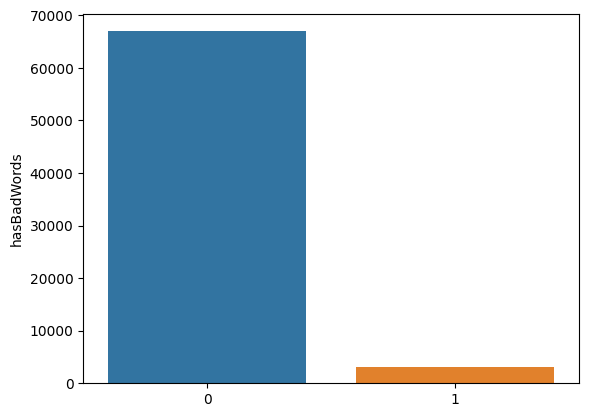

In [14]:
X = df_train['hasBadWords'].value_counts()
print(X)
sns.barplot(y = X,
            x = X.index,
            data = df_train);

In [15]:
df_train.isna().sum()

text           0
hasBadWords    0
dtype: int64

In [16]:
# WORD-COUNT
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
print(df_train[df_train['hasBadWords']==1]['word_count'].mean()) #Disaster tweets
print(df_train[df_train['hasBadWords']==0]['word_count'].mean()) #Non-Disaster tweets

197.26792203501816
36.144879279709734


Text(0.5, 0.98, 'Words in sentanses')

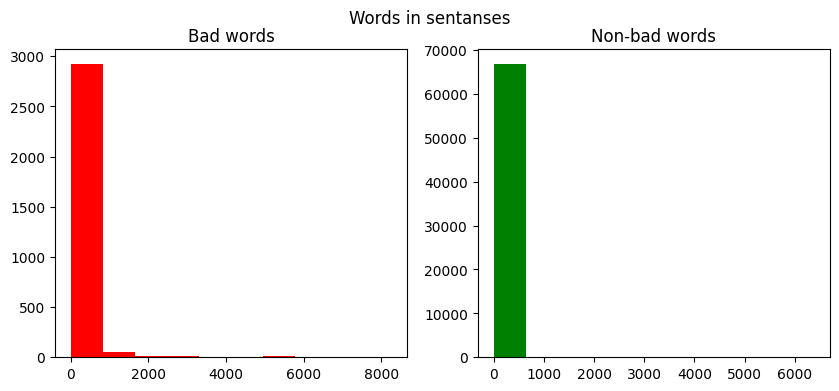

In [17]:
# PLOTTING WORD-COUNT
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_train[df_train['hasBadWords']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Bad words')
train_words=df_train[df_train['hasBadWords']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-bad words')
fig.suptitle('Words in sentanses')

In [18]:
# CHARACTER-COUNT
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
print(df_train[df_train['hasBadWords']==1]['char_count'].mean()) #Badwords
print(df_train[df_train['hasBadWords']==0]['char_count'].mean()) #Non badwords

1960.6983812355468
288.7319666134114


In [19]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

In [20]:
# STOPWORD REMOVAL
def stopword(string):
    a = [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [21]:
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [22]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df_train['clean_text'] = df_train['text'].apply(lambda x: finalpreprocess(x))
df_train.head()

,text,hasBadWords,word_count,char_count,clean_text
0,My Favorite Slut,0,3,16,favorite slut
1,girlfriends sit on each other's faces with the...,0,9,54,girlfriend sit face ass
2,bound beauty kisses her girlfriend,0,5,34,bound beauty kiss girlfriend
3,MORGAN - Anytime - Nail Painting On The Slave'...,0,10,52,morgan anytime nail painting slave face
4,TRANSGENDER COACHING (wmv) PART 1,0,5,33,transgender coach wmv part


In [23]:
# create Word2vec model
#here words_f should be a list containing words from each document. say 1st row of the list is words from the 1st document/sentence
#length of words_f is number of documents/sentences in your dataset
df_train['clean_text_tok']=[nltk.word_tokenize(i) for i in df_train['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_train['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it

w2v = dict(zip(model.wv.key_to_index.keys(), model.wv.vectors))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [24]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df_train["clean_text"], df_train["hasBadWords"], test_size=0.2, shuffle=True)
# Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok = [nltk.word_tokenize(i) for i in X_train]  
X_test_tok = [nltk.word_tokenize(i) for i in X_test]

In [25]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
def fit(self, X, y):
        return self
def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])
    
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
    def fit(self, X, y):
        return self
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

w2v = dict(zip(model.wv.key_to_index.keys(), model.wv.vectors)) 
df_train['clean_text_tok'] = [nltk.word_tokenize(i) for i in df_train['clean_text']]
model = Word2Vec(df_train['clean_text_tok'], min_count=1)     
modelw = MeanEmbeddingVectorizer(w2v)

# converting text to numerical data using Word2Vec
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_test_tok)

In [26]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
# Input: "reviewText", "rating" and "time"
# Target: "log_votes"
X_train, X_val, y_train, y_val = train_test_split(df_train["clean_text"],
                                                  df_train["hasBadWords"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

In [27]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf = LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
coheh_score = cohen_kappa_score(y_val, y_predict)
print('Cohen Kappa:', coheh_score) 
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13389
           1       0.95      0.64      0.76       611

    accuracy                           0.98     14000
   macro avg       0.97      0.82      0.88     14000
weighted avg       0.98      0.98      0.98     14000

Confusion Matrix: [[13367    22]
 [  222   389]]
Cohen Kappa: 0.7525670086350926
AUC: 0.9588137488342962


In [28]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val, y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
coheh_score = cohen_kappa_score(y_val, y_predict)
print('Cohen Kappa:', coheh_score)  
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13389
           1       0.56      0.01      0.03       611

    accuracy                           0.96     14000
   macro avg       0.76      0.51      0.50     14000
weighted avg       0.94      0.96      0.94     14000

Confusion Matrix: [[13382     7]
 [  602     9]]
Cohen Kappa: 0.026539861856803904
AUC: 0.7745093041787852


In [29]:
#Testing it on new dataset with the best model
 #reading the data
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text'] 
X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
y_predict = lr_tfidf.predict(X_vector)      #use the trained model on X_vector
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob'] = y_prob
df_test['hasBadWords'] = y_predict
print(df_test.head())
final = df_test[['clean_text', 'hasBadWords', 'predict_prob']].reset_index(drop=True)
final.to_csv('datasets/submission.csv')

                                                    text  hasBadWords  \
70001  <center><div class='bottom_html' align='center...            0   
70002  <p align="center"><iframe width=650 height=280...            0   
70003  <center><div class='bottom_html' align='center...            0   
70004  <center><div class='bottom_html' align='center...            0   
70005  <center><div class='bottom_html' align='center...            0   

                                              clean_text  predict_prob  
70001                                                         0.004078  
70002                                                         0.004078  
70003                                                         0.004078  
70004                                                         0.004078  
70005  div style width height px background color bla...      0.031555  
